## Installing and Importing libraries

In [1]:
!pip install -q tflite-model-maker
!pip install -q pycocotools

     |████████████████████████████████| 616 kB 34.8 MB/s 
     |████████████████████████████████| 1.1 MB 27.6 MB/s 
     |████████████████████████████████| 234 kB 74.6 MB/s 
     |████████████████████████████████| 1.1 MB 61.5 MB/s 
     |████████████████████████████████| 120 kB 67.6 MB/s 
     |████████████████████████████████| 87 kB 7.8 MB/s 
     |████████████████████████████████| 77 kB 7.0 MB/s 
     |████████████████████████████████| 596 kB 61.4 MB/s 
     |████████████████████████████████| 1.2 MB 58.4 MB/s 
     |████████████████████████████████| 840 kB 52.4 MB/s 
     |████████████████████████████████| 6.4 MB 55.7 MB/s 
     |████████████████████████████████| 3.4 MB 59.7 MB/s 
     |████████████████████████████████| 25.3 MB 1.3 MB/s 
     |████████████████████████████████| 99 kB 10.4 MB/s 
     |████████████████████████████████| 47.7 MB 65 kB/s 
     |████████████████████████████████| 352 kB 54.5 MB/s 
     |████████████████████████████████| 462 kB 12.4 MB/s 
     |██████████████

In [2]:
from tensorflow_examples.lite.model_maker.core.data_util.image_dataloader import ImageClassifierDataLoader
from tensorflow_examples.lite.model_maker.core.task import image_classifier
import tflite_model_maker.image_classifier 
import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time 

## Importing the dataset 

In [3]:
import os 
os.environ['KAGGLE_CONFIG_DIR'] = '/content/'

In [4]:
!kaggle datasets download -d rahilmehtaucoe2784/cloth-pattern

 99% 1.69G/1.71G [00:46<00:00, 53.9MB/s]
100% 1.71G/1.71G [00:46<00:00, 39.2MB/s]


In [5]:
%%capture
!unzip \*.zip && rm *.zip &> /dev/null

## Train


In [6]:
image_path = "/content/Dataset/Train"
test_image_path = "/content/Dataset/test"
data = ImageClassifierDataLoader.from_folder(image_path)
test_data = ImageClassifierDataLoader.from_folder(test_image_path)

INFO:tensorflow:Load image with size: 4692, num_label: 7, labels: checkered, dots, florals , horizontal strip, paisley pattern, vertical strip, zig zag .
INFO:tensorflow:Load image with size: 77, num_label: 7, labels: checkered, dots , florals, horizonal strip, paisley pattern, vertical strip, zig zag.


In [7]:
#train_data, rest_data = data.split(0.8)
train_data, validation_data = data.split(0.8)
#validation_data, test_data = rest_data.split(0.5)

In [8]:
print(f"total imagees in Train data is : {len(train_data)}")
print(f"total imagees in Validate data is : {len(validation_data)}")
print(f"total imagees in Test data is : {len(test_data)}")

total imagees in Train data is : 3753
total imagees in Validate data is : 939
total imagees in Test data is : 77


In [9]:
start = time.time()
model = image_classifier.create(train_data, 
                                model_spec= tflite_model_maker.image_classifier.EfficientNetLite4Spec(), 
                                epochs = 10,
                                batch_size = 64,
                                validation_data = validation_data,
                                )
end = time.time()

INFO:tensorflow:Retraining the models...
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2 (HubKe  (None, 1280)             11837936  
 rasLayerV1V2)                                                   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 7)                 8967      
                                                                 
Total params: 11,846,903
Trainable params: 8,967
Non-trainable params: 11,837,936
_________________________________________________________________
None
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


58/58 [==============================] - 247s 4s/step - loss: 1.3787 - accuracy: 0.5730 - val_loss: 1.0077 - val_accuracy: 0.7870
Epoch 2/10
58/58 [==============================] - 231s 4s/step - loss: 0.9476 - accuracy: 0.8133 - val_loss: 0.8728 - val_accuracy: 0.8520
Epoch 3/10
58/58 [==============================] - 230s 4s/step - loss: 0.8573 - accuracy: 0.8545 - val_loss: 0.8158 - val_accuracy: 0.8765
Epoch 4/10
58/58 [==============================] - 229s 4s/step - loss: 0.8132 - accuracy: 0.8742 - val_loss: 0.7823 - val_accuracy: 0.8903
Epoch 5/10
58/58 [==============================] - 229s 4s/step - loss: 0.7853 - accuracy: 0.8858 - val_loss: 0.7621 - val_accuracy: 0.8988
Epoch 6/10
58/58 [==============================] - 229s 4s/step - loss: 0.7633 - accuracy: 0.8971 - val_loss: 0.7442 - val_accuracy: 0.9084
Epoch 7/10
58/58 [==============================] - 228s 4s/step - loss: 0.7497 - accuracy: 0.9060 - val_loss: 0.7345 - val_accuracy: 0.9148
Epoch 8/10
58/58 [======

In [10]:
print(f"The time taken to train the model is {(end-start)/60} minutes")

The time taken to train the model is 41.72804531653722 minutes


## Evaluation 

In [11]:
start = time.time()
loss, accuracy = model.evaluate(test_data)
end = time.time()

3/3 [==============================] - 3s 502ms/step - loss: 0.7900 - accuracy: 0.8182


In [12]:
print(f"The time taken to evaluate test_data is {str(end-start)[0:4]} sec and with {str(accuracy*100)[:5]}% accuracy")

The time taken to evaluate test_data is 2.94 sec and with 81.81% accuracy


### Visuallising the test sample 

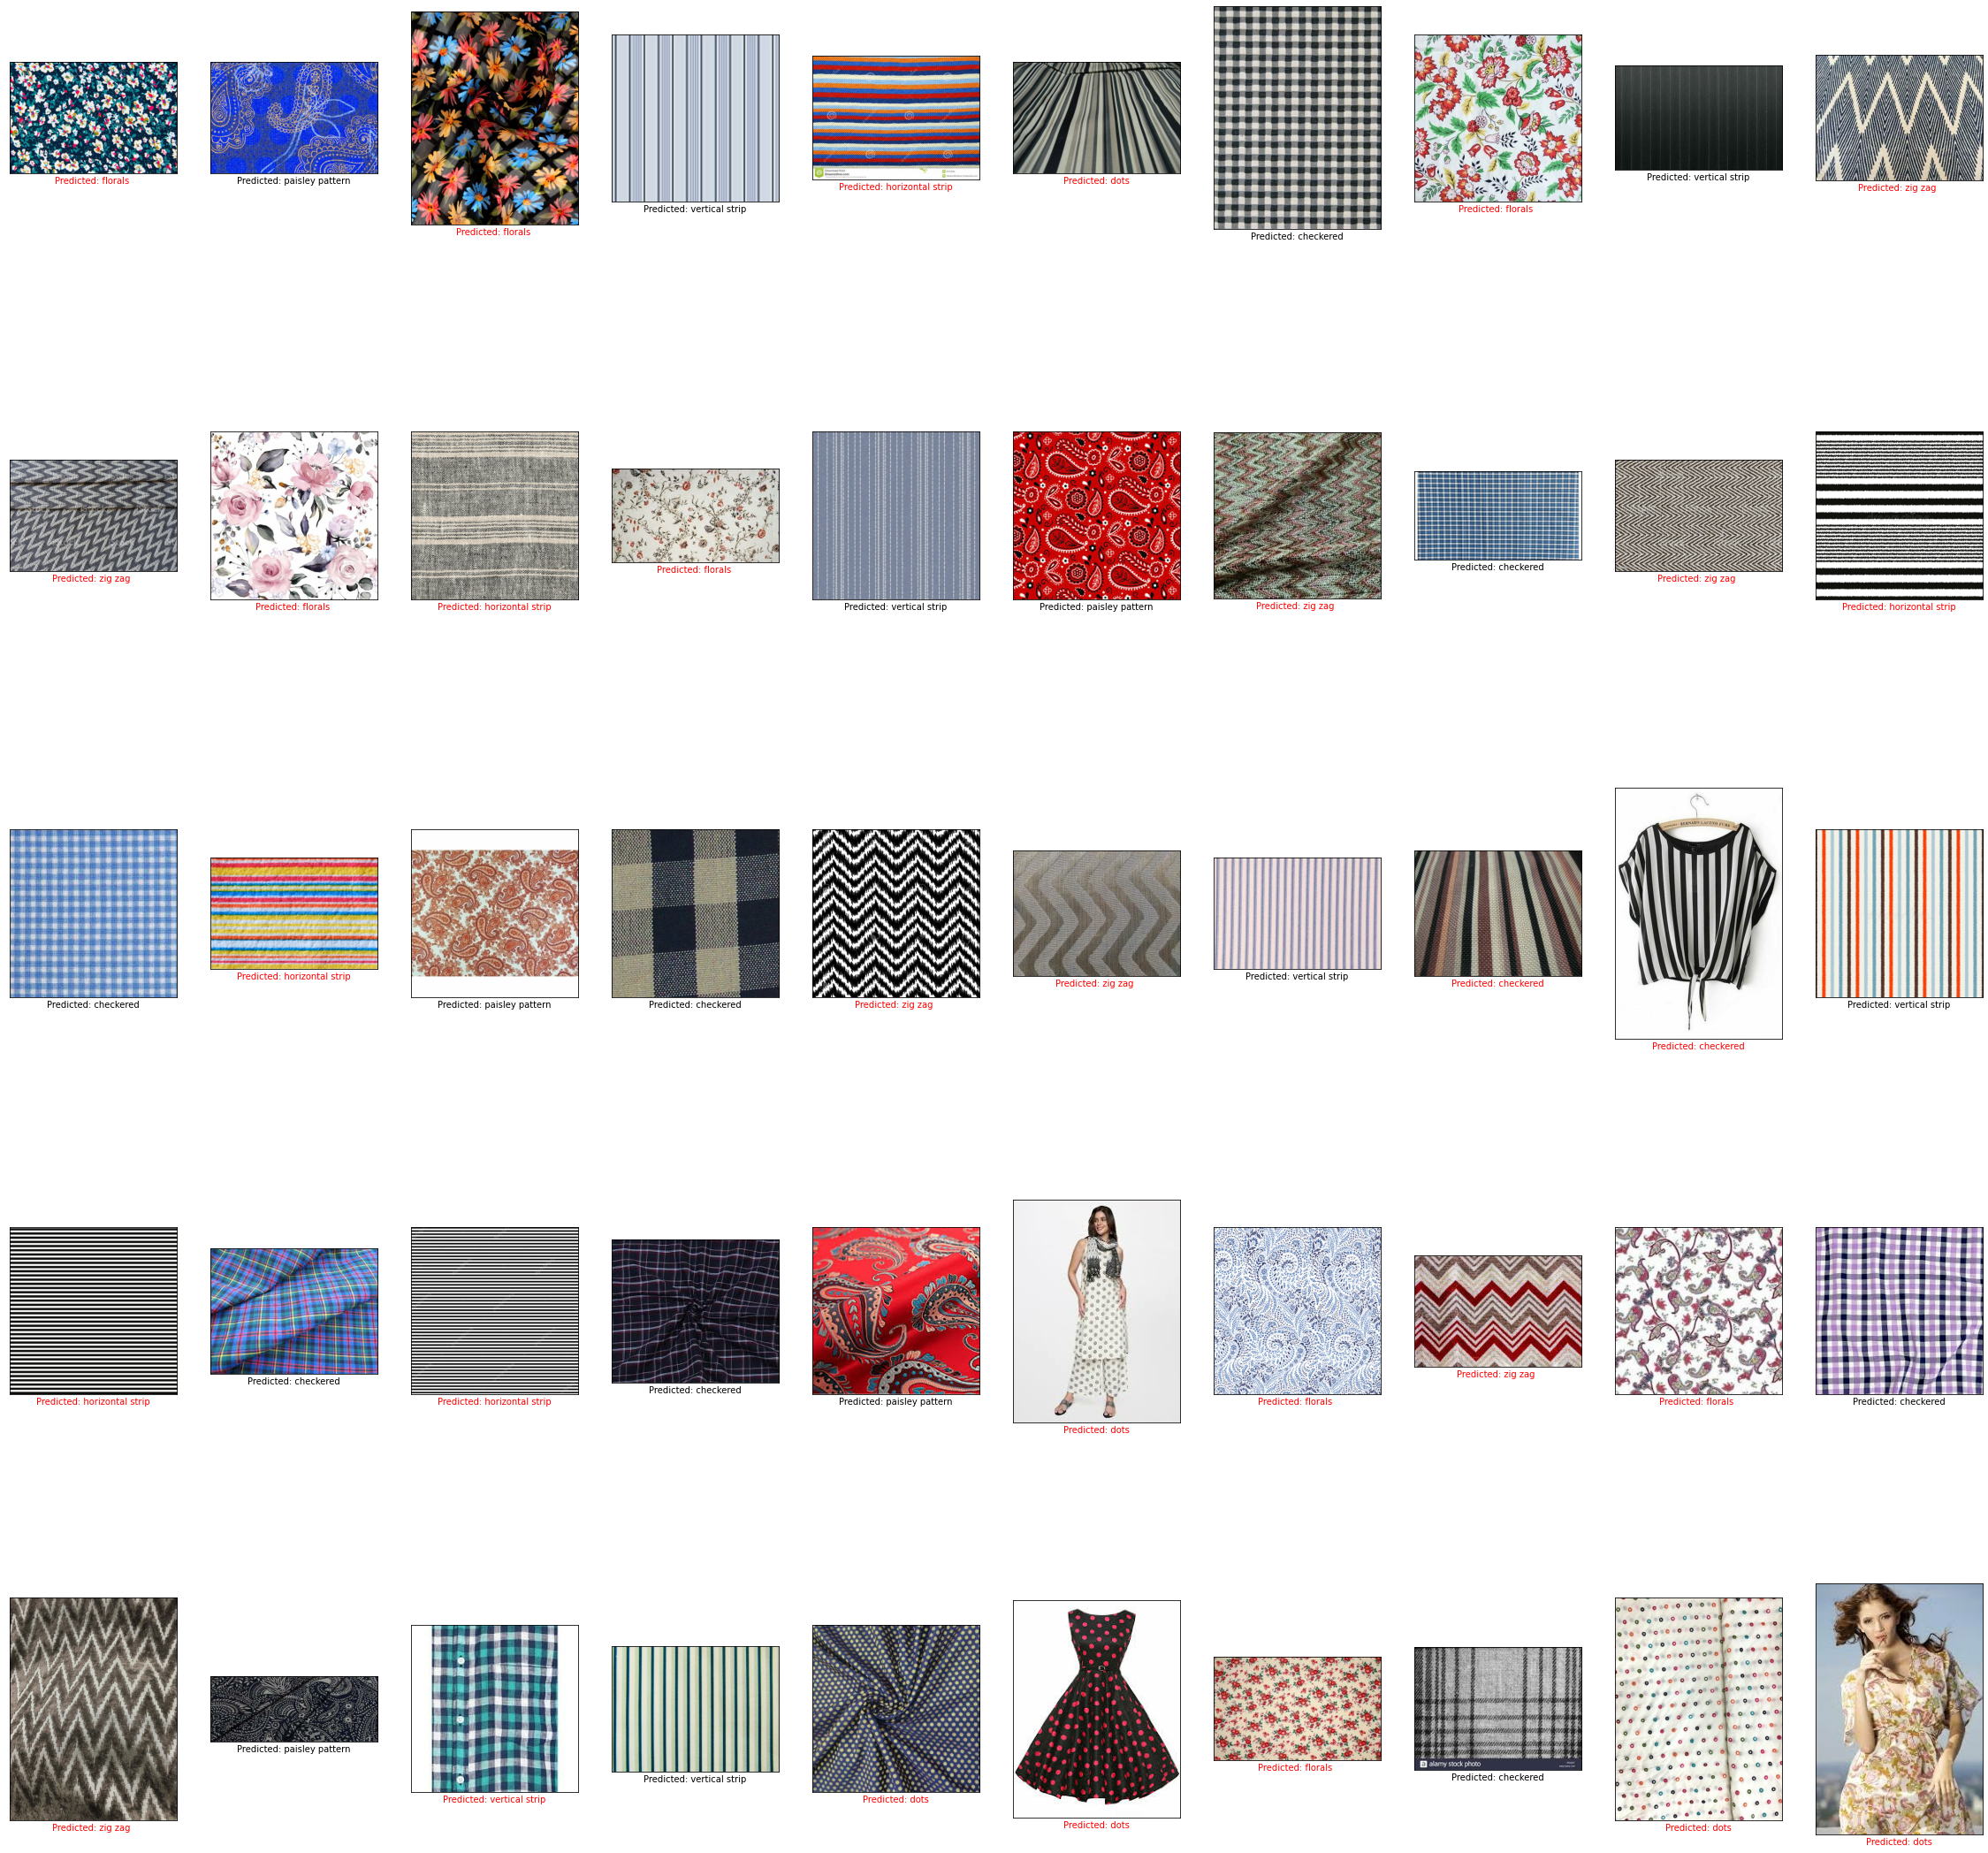

In [13]:
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

# Then plot 100 test images and their predicted labels.
# If a prediction result is different from the label provided label in "test"
# dataset, we will highlight it in red color.
plt.figure(figsize=(40, 40))
predicts = model.predict_top_k(test_data)
for i, (image, label) in enumerate(test_data.gen_dataset().unbatch().take(50)):
  ax = plt.subplot(5, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          test_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel('Predicted: %s' % predict_label)
plt.show()

## Saving the model 

In [14]:
model.export(export_dir='.')

INFO:tensorflow:Assets written to: /tmp/tmpp9lgyrd0/assets


INFO:tensorflow:Assets written to: /tmp/tmpp9lgyrd0/assets
/usr/local/lib/python3.7/dist-packages/tensorflow/lite/python/convert.py:746: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmp5k5b9df2/labels.txt


INFO:tensorflow:Saving labels in /tmp/tmp5k5b9df2/labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model.tflite


In [ ]:
from tflite_model_maker.config import ExportFormat

In [ ]:
model.export(export_dir='.', export_format=ExportFormat.LABEL)

INFO:tensorflow:Saving labels in ./labels.txt


INFO:tensorflow:Saving labels in ./labels.txt


100%|██████████| 11/11 [00:00<00:00, 1861.58it/s]

[]
